# Cargar dataset y hacer exploración con pandas, matplotlib y plotly

In [1]:
# Importar pandas, numpy, matplotlib y plotly
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
# cargar train
train = pd.read_csv("data/train.csv",parse_dates=['DateTime'])
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [3]:
# la mayoría de las columnas son categóricas
# describir columnas
train.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A705005,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824
first,NaN,NaN,2013-10-01 09:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2016-02-21 19:17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Name, checar si el animal tiene nombre o no
train['HasName'] = train['Name'].notnull() * 1 # para convertir el booleano a int
train['HasName'].value_counts()

1    19038
0     7691
Name: HasName, dtype: int64

In [5]:
# DateTime, extraer año, mes, día, día de la semana y hora
train['Year'] = pd.to_datetime(train.DateTime).dt.year
train['Month'] = pd.to_datetime(train.DateTime).dt.month
train['DayOfWeek'] = pd.to_datetime(train.DateTime).dt.dayofweek
train['Hour'] = pd.to_datetime(train.DateTime).dt.hour
train['Year'].value_counts()

2015    11481
2014    11179
2013     2702
2016     1367
Name: Year, dtype: int64

In [6]:
# OutcomeType cinco tipos de resultados
pd.crosstab(train.OutcomeType,train.AnimalType)

AnimalType,Cat,Dog
OutcomeType,,
Adoption,4272,6497
Died,147,50
Euthanasia,710,845
Return_to_owner,500,4286
Transfer,5505,3917


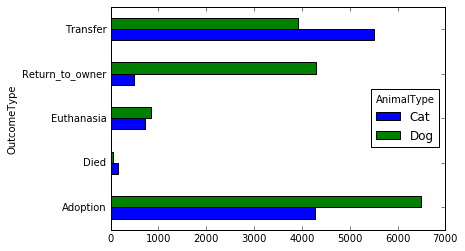

In [7]:
pd.crosstab(train.OutcomeType,train.AnimalType).plot(kind='barh',stacked=False)

In [8]:
# normalizamos los datos
OutcomeByAnimalType = train[['AnimalID','AnimalType','OutcomeType']]
OutcomeByAnimalType
NormalizedOutcome = OutcomeByAnimalType.groupby(['OutcomeType','AnimalType']).count().unstack()
NormalizedOutcome['Total'] = NormalizedOutcome['AnimalID']['Cat'] + NormalizedOutcome['AnimalID']['Dog']
NormalizedOutcome['CatR'] = NormalizedOutcome['AnimalID']['Cat'] / NormalizedOutcome['Total']
NormalizedOutcome['DogR'] = NormalizedOutcome['AnimalID']['Dog'] / NormalizedOutcome['Total']
NormalizedOutcome

AnimalID        Total      CatR      DogR
AnimalType           Cat   Dog                           
OutcomeType                                              
Adoption            4272  6497  10769  0.396694  0.603306
Died                 147    50    197  0.746193  0.253807
Euthanasia           710   845   1555  0.456592  0.543408
Return_to_owner      500  4286   4786  0.104471  0.895529
Transfer            5505  3917   9422  0.584271  0.415729

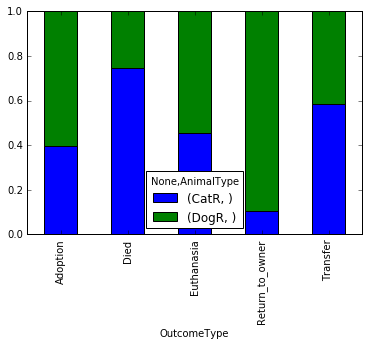

In [9]:
# visualizamos los datos con matplotlib
NormalizedOutcome[['CatR','DogR']].plot(kind='bar',stacked=True)

In [10]:
#OutcomeByAge = train[['AnimalID','AnimalType','OutcomeType','AgeInDays']]
#OutcomeByAge
#UnstackedOutcomeByAge = OutcomeByAge.groupby(['OutcomeType','AnimalType']).mean().unstack()
#UnstackedOutcomeByAge

In [11]:
# OutcomeSubtype, vemos los subtipos de resultados
#pd.crosstab(train.OutcomeSubtype,trainAnimalType)
# normalizamos los datos
#OutcomeSubtypeByAnimalType = train[['AnimalID','AnimalType','OutcomeSubtype']]
#OutcomeSubtypeByAnimalType
#NormalizedOutcomeSubtype = OutcomeSubtypeByAnimalType.groupby(['OutcomeSubtype','AnimalType']).count().unstack()
#NormalizedOutcomeSubtype['Total'] = NormalizedOutcomeSubtype['AnimalID']['Cat'] + NormalizedOutcomeSubtype['AnimalID']['Dog']
#NormalizedOutcomeSubtype['CatR'] = NormalizedOutcomeSubtype['AnimalID']['Cat'] / NormalizedOutcomeSubtype['Total']
#NormalizedOutcomeSubtype['DogR'] = NormalizedOutcomeSubtype['AnimalID']['Dog'] / NormalizedOutcomeSubtype['Total']
#NormalizedOutcomeSubtype

In [12]:
# visualizamos los datos con matplotlib
#NormalizedOutcomeSubtype[['CatR','DogR']].plot(kind='bar',stacked=True)

In [13]:
# AnimalType, convertir en booleano
train['IsDog'] = train['AnimalType'].map({'Cat':0,'Dog':1})
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,HasName,Year,Month,DayOfWeek,Hour,IsDog
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1,2014,2,2,18,1
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,2013,10,6,12,0
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,1,2015,1,5,12,1
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0,2014,7,4,19,0
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0,2013,11,4,12,1


In [14]:
# SexuponOutcome, extraemos de la columna el sexo y si el animal fue esterilizado o no
def get_sex(x):
    x = str(x)
    if x.find('Male') >= 0: return 'male'
    if x.find('Female') >= 0: return 'female'
    return 'unknown'
# # There is NaN and Unknown in Sex
# df["SexuponOutcome"]=df["SexuponOutcome"].fillna("Unknown")
train['Sex'] = train.SexuponOutcome.apply(get_sex)
def get_fixed(x):
    x = str(x)
    if x.find('Spayed') >= 0: return 1
    if x.find('Neutered') >= 0: return 1
    if x.find('Intact') >= 0: return 0
    return 'unknown'
train['IsFixed'] = train.SexuponOutcome.apply(get_fixed)
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,HasName,Year,Month,DayOfWeek,Hour,IsDog,Sex,IsFixed
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1,2014,2,2,18,1,male,1
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,2013,10,6,12,0,female,1
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,1,2015,1,5,12,1,male,1
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0,2014,7,4,19,0,male,0
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0,2013,11,4,12,1,male,1


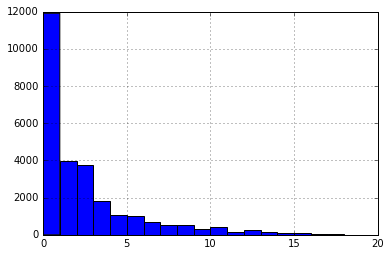

In [18]:
# AgeuponOutcome, la columna de edad no está normalizada, necesitamos convertirla a una única unidad (años)
# para eso voy a agregar una nueva columna al dataset y dividir días / 365, semanas / 52 y meses / 12
# normalizar la edad en días
def age_in_years(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age * 1.
    if x.find('month')> -1: return age / 12.
    if x.find('week')> -1: return age / 52.
    if x.find('day')> -1: return age / 365.
    else: return 0
train['AgeInYears'] = train.AgeuponOutcome.apply(age_in_years)
# visualizar datos en matplotlib
train['AgeInYears'].hist(bins=20)

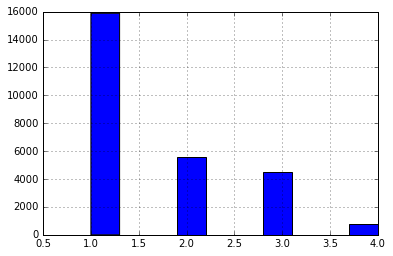

In [16]:
# clasificamos la edad por rangos
def age_category(x):
    if x <= 1: return 1 # menor o igual a un año
    if x <= 3: return 2 # menor o igual a tres años
    if x <= 10: return 3 # menor o igual a diez años
    return 4 # mayor a diez años
train['AgeCategory'] = train.AgeInYears.apply(age_category)
# visualizar datos en matplotlib
train['AgeCategory'].hist()

In [19]:
# Breed, extraemos de la raza si es mixta o no
def get_mix(x):
    x = str(x)
    if x.find('Mix') >= 0: return 1
    return 0
train['IsMixed'] = train.Breed.apply(get_mix)
train.head()
train['IsMixed'].value_counts()

1    22298
0     4431
Name: IsMixed, dtype: int64

In [21]:
# Color, revisamos los valores
train['Color'].value_counts()

In [ ]:
train.head()

In [22]:
#DiedByAnimalType = train[['AnimalID','AnimalType','AgeInYears']] #OutcomeSubtype
train.loc[train['OutcomeType'].isin(['Euthanasia','Died'])].head()
#OutcomeSubtypeByAnimalType

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,...,Year,Month,DayOfWeek,Hour,IsDog,Sex,IsFixed,AgeInYears,AgeCategory,IsMixed
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,...,2013,10,6,12,0,female,1,1.0,1,1
30,A718535,NaN,2016-01-01 13:57:00,Euthanasia,Suffering,Cat,Spayed Female,3 years,Domestic Shorthair Mix,Calico,...,2016,1,4,13,0,female,1,3.0,2,1
35,A668626,NaN,2013-12-06 14:55:00,Euthanasia,Suffering,Dog,Intact Male,3 years,Labrador Retriever Mix,Yellow,...,2013,12,4,14,1,male,0,3.0,2,1
49,A666092,NaN,2013-10-30 15:37:00,Euthanasia,Aggressive,Dog,Intact Male,6 years,Pit Bull/Labrador Retriever,Chocolate/White,...,2013,10,2,15,1,male,0,6.0,3,0
61,A678506,Prec Punkin',2014-05-09 18:07:00,Euthanasia,Suffering,Dog,Spayed Female,11 years,Yorkshire Terrier Mix,Brown/Black,...,2014,5,4,18,1,female,1,11.0,4,1


In [23]:
data = [Box(x = train['OutcomeType'], y = train['AgeInYears'], showlegend=False)]
data
iplot(data)

In [24]:
Dogs = train.loc[train['AnimalType'].isin(['Dog'])]

data = [Box(x = Dogs['OutcomeType'], y = Dogs['AgeInYears'], showlegend=False)]
data
iplot(data)

In [25]:
Cats = train.loc[train['AnimalType'].isin(['Cat'])]

data = [Box(x = Cats['OutcomeType'], y = Cats['AgeInYears'], showlegend=False)]
data
iplot(data)

In [26]:
DeadAnimals = train.loc[train['OutcomeType'].isin(['Euthanasia','Died'])]

DeadAnimalsByType = train[['AnimalID','AnimalType','AgeInYears']]

data = [Box(x = DeadAnimalsByType['AnimalType'], y = DeadAnimalsByType['AgeInYears'], showlegend=False)]
data
iplot(data)

In [54]:
ReturnedAnimals = train.loc[train['OutcomeType'].isin(['Return_to_owner'])]

#DeadAnimalsByType = train[['AnimalID','AnimalType','AgeInYears']]

data = [Box(x = ReturnedAnimals['Sex'], y = ReturnedAnimals['AgeInYears'], showlegend=False)]
data
iplot(data)

In [56]:
EuthanizedAnimals = train.loc[train['OutcomeType'].isin(['Euthanasia'])]

#DeadAnimalsByType = train[['AnimalID','AnimalType','AgeInYears']]

data = [Box(x = EuthanizedAnimals['OutcomeSubtype'], y = EuthanizedAnimals['AgeInYears'], showlegend=False)]
data
iplot(data)

In [58]:
Agressivenimals = train.loc[train['OutcomeSubtype'].isin(['Aggressive'])]

#DeadAnimalsByType = train[['AnimalID','AnimalType','AgeInYears']]

data = [Box(x = Agressivenimals['AnimalType'], y = Agressivenimals['AgeInYears'], showlegend=False)]
data
iplot(data)